In [28]:
# Cell 1: Setup and Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Replace 'your_api_key' with your actual Token Terminal API key
API_KEY = '2acb79dd-f8ca-48b5-b10c-bbee2290ed94'
BASE_URL = 'https://api.tokenterminal.com/v2'



In [29]:
# Cell 2: Fetch Functions
def fetch_projects():
    url = f'{BASE_URL}/projects'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_metrics():
    url = f'{BASE_URL}/metrics'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_time_series_data(metric_id, project_ids, start_date, end_date):
    cache = {}
    project_ids_str = ','.join(project_ids)
    url = f'{BASE_URL}/metrics/{metric_id}'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    params = {
        'project_ids': project_ids_str,
        'start': start_date,
        'end': end_date
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 404:
        print(f"Data for projects or metric ID '{metric_id}' not found.")
        return cache
    response.raise_for_status()  # Raise an exception for other HTTP errors
    data = response.json()['data']
    
    for entry in data:
        project_id = entry['project_id']
        if project_id not in cache:
            cache[project_id] = []
        cache[project_id].append(entry)
    
    for project_id in cache:
        cache[project_id] = pd.DataFrame(cache[project_id])
    
    return cache


In [30]:
# Cell 3: Utility Functions
def plot_time_series(data_dict, metric_name):
    plt.figure(figsize=(10, 6))
    for project_id, data in data_dict.items():
        if data.empty:
            continue
        data['timestamp'] = pd.to_datetime(data['timestamp'])
        plt.plot(data['timestamp'], data['value'], marker='o', label=project_id)
    plt.title(f'{metric_name} Over Time for Selected Projects')
    plt.xlabel('Date')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()


                name         project_id symbol                             url
0                 0x                 0x    ZRX                 /v2/projects/0x
1              1inch              1inch  1INCH              /v2/projects/1inch
2               Aave               aave   AAVE               /v2/projects/aave
3           Aave GHO            aavegho    GHO            /v2/projects/aavegho
4  Abracadabra.money  abracadabra-money  SPELL  /v2/projects/abracadabra-money
                      metric_id                     metric_name  \
0                         price                           Price   
1      market_cap_fully_diluted      Market cap (fully diluted)   
2        market_cap_circulating        Market cap (circulating)   
3          token_trading_volume            Token trading volume   
4  token_turnover_fully_diluted  Token turnover (fully diluted)   

                                         description  \
0  average USD value of the protocol’s governance...   
1  maximum 

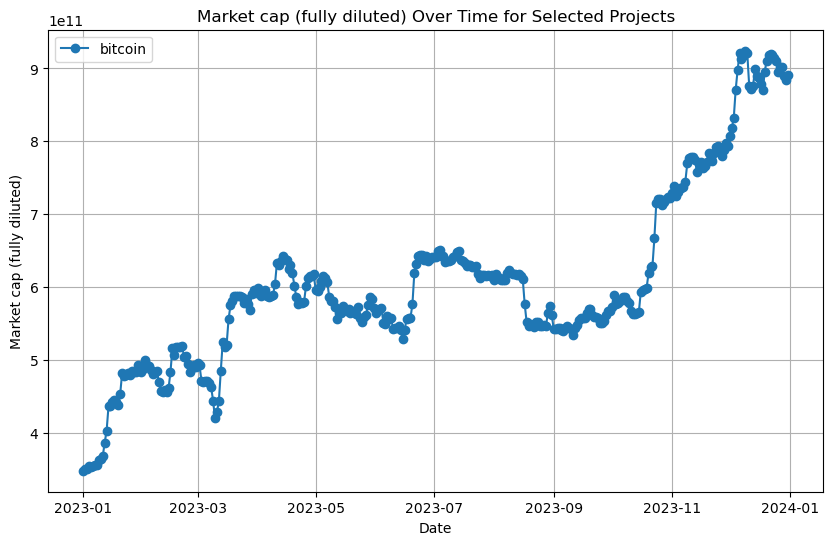

In [31]:
# Cell 4: Main Execution
# Fetch projects and metrics data
projects = fetch_projects()
metrics = fetch_metrics()

# Convert projects and metrics to DataFrame for easier manipulation
projects_df = pd.DataFrame(projects['data'])
metrics_df = pd.DataFrame(metrics['data'])

# Display the first few rows of the DataFrames
print(projects_df.head())
print(metrics_df.head())

# Example metric ID for fetching time-series data
metric_id = 'market_cap_fully_diluted'  # Example metric ID

# Limit to a subset of project IDs
project_ids = ['bitcoin']  # Example project IDs
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch time series data for the given metric and project IDs
time_series_data = fetch_time_series_data(metric_id, project_ids, start_date, end_date)

# Plot the time series data
metric_name = metrics_df[metrics_df['metric_id'] == metric_id]['metric_name'].values[0]
plot_time_series(time_series_data, metric_name)


                name         project_id symbol                             url
0                 0x                 0x    ZRX                 /v2/projects/0x
1              1inch              1inch  1INCH              /v2/projects/1inch
2               Aave               aave   AAVE               /v2/projects/aave
3           Aave GHO            aavegho    GHO            /v2/projects/aavegho
4  Abracadabra.money  abracadabra-money  SPELL  /v2/projects/abracadabra-money
                      metric_id                     metric_name  \
0                         price                           Price   
1      market_cap_fully_diluted      Market cap (fully diluted)   
2        market_cap_circulating        Market cap (circulating)   
3          token_trading_volume            Token trading volume   
4  token_turnover_fully_diluted  Token turnover (fully diluted)   

                                         description  \
0  average USD value of the protocol’s governance...   
1  maximum 

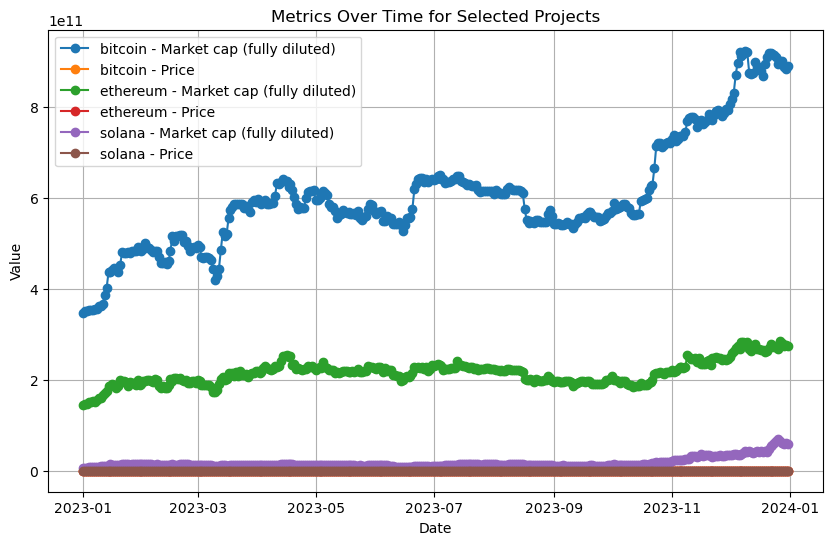

In [35]:
# Cell 2: Fetch Functions
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '2acb79dd-f8ca-48b5-b10c-bbee2290ed94'
BASE_URL = 'https://api.tokenterminal.com/v2'

def fetch_projects():
    url = f'{BASE_URL}/projects'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_metrics():
    url = f'{BASE_URL}/metrics'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_time_series_data(metric_ids, project_ids, start_date, end_date):
    cache = {project_id: {} for project_id in project_ids}
    project_ids_str = ','.join(project_ids)
    
    for metric_id in metric_ids:
        url = f'{BASE_URL}/metrics/{metric_id}'
        headers = {
            'Authorization': f'Bearer {API_KEY}'
        }
        params = {
            'project_ids': project_ids_str,
            'start': start_date,
            'end': end_date
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 404:
            print(f"Data for projects or metric ID '{metric_id}' not found.")
            continue
        response.raise_for_status()  # Raise an exception for other HTTP errors
        data = response.json()['data']
        
        for entry in data:
            project_id = entry['project_id']
            if project_id not in cache:
                cache[project_id] = {}
            if metric_id not in cache[project_id]:
                cache[project_id][metric_id] = []
            cache[project_id][metric_id].append(entry)
    
    for project_id in cache:
        for metric_id in cache[project_id]:
            cache[project_id][metric_id] = pd.DataFrame(cache[project_id][metric_id])
    
    return cache

# Cell 3: Utility Functions
def plot_time_series(data_dict, metrics_df):
    plt.figure(figsize=(10, 6))
    for project_id, metrics_data in data_dict.items():
        for metric_id, data in metrics_data.items():
            if data.empty:
                continue
            data['timestamp'] = pd.to_datetime(data['timestamp'])
            metric_name = metrics_df[metrics_df['metric_id'] == metric_id]['metric_name'].values[0]
            plt.plot(data['timestamp'], data['value'], marker='o', label=f'{project_id} - {metric_name}')
    
    plt.title('Metrics Over Time for Selected Projects')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cell 4: Main Execution
# Fetch projects and metrics data
projects = fetch_projects()
metrics = fetch_metrics()

# Convert projects and metrics to DataFrame for easier manipulation
projects_df = pd.DataFrame(projects['data'])
metrics_df = pd.DataFrame(metrics['data'])

# Display the first few rows of the DataFrames
print(projects_df.head())
print(metrics_df.head())

# Example metric IDs for fetching time-series data
metric_ids = ['market_cap_fully_diluted', 'price']  # Example metric IDs

# Limit to a subset of project IDs
project_ids = ['bitcoin','ethereum','solana']  # Example project IDs
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch time series data for the given metrics and project IDs
time_series_data = fetch_time_series_data(metric_ids, project_ids, start_date, end_date)

# Plot the time series data
plot_time_series(time_series_data, metrics_df)


In [38]:
time_series_data['bitcoin']['price'].head()

,timestamp,project_name,project_id,metric_id,value
0,2023-12-31 00:00:00+00:00,Bitcoin,bitcoin,price,42420.374979
1,2023-12-30 00:00:00+00:00,Bitcoin,bitcoin,price,42114.405849
2,2023-12-29 00:00:00+00:00,Bitcoin,bitcoin,price,42331.754873
3,2023-12-28 00:00:00+00:00,Bitcoin,bitcoin,price,42934.422769
4,2023-12-27 00:00:00+00:00,Bitcoin,bitcoin,price,42919.664778


                name         project_id symbol                             url
0                 0x                 0x    ZRX                 /v2/projects/0x
1              1inch              1inch  1INCH              /v2/projects/1inch
2               Aave               aave   AAVE               /v2/projects/aave
3           Aave GHO            aavegho    GHO            /v2/projects/aavegho
4  Abracadabra.money  abracadabra-money  SPELL  /v2/projects/abracadabra-money
                      metric_id                     metric_name  \
0                         price                           Price   
1      market_cap_fully_diluted      Market cap (fully diluted)   
2        market_cap_circulating        Market cap (circulating)   
3          token_trading_volume            Token trading volume   
4  token_turnover_fully_diluted  Token turnover (fully diluted)   

                                         description  \
0  average USD value of the protocol’s governance...   
1  maximum 

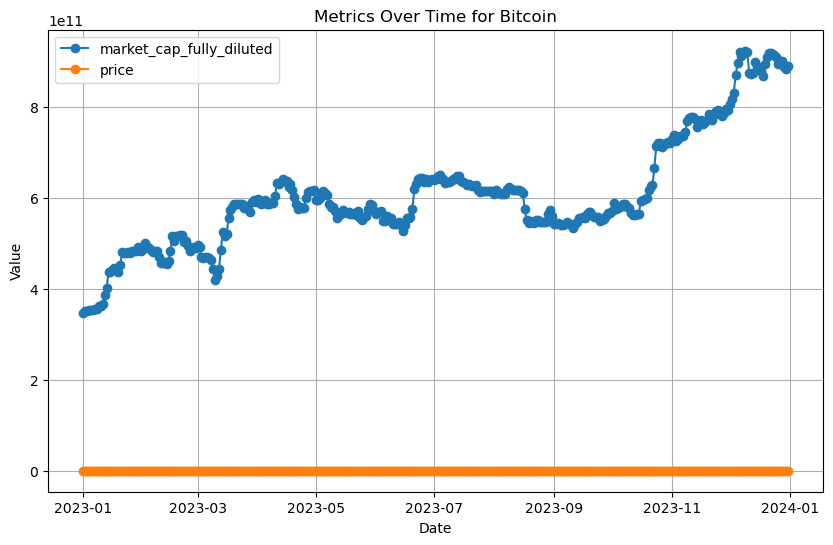

In [43]:
def fetch_projects():
    url = f'{BASE_URL}/projects'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_metrics():
    url = f'{BASE_URL}/metrics'
    headers = {
        'Authorization': f'Bearer {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors
    return response.json()

def fetch_time_series_data(metric_ids, project_ids, start_date, end_date):
    cache = {project_id: [] for project_id in project_ids}
    project_ids_str = ','.join(project_ids)
    
    for metric_id in metric_ids:
        url = f'{BASE_URL}/metrics/{metric_id}'
        headers = {
            'Authorization': f'Bearer {API_KEY}'
        }
        params = {
            'project_ids': project_ids_str,
            'start': start_date,
            'end': end_date
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 404:
            print(f"Data for projects or metric ID '{metric_id}' not found.")
            continue
        response.raise_for_status()  # Raise an exception for other HTTP errors
        data = response.json()['data']
        
        for entry in data:
            cache[entry['project_id']].append(entry)
    
    for project_id in cache:
        if cache[project_id]:
            df = pd.DataFrame(cache[project_id])
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df = df.pivot(index='timestamp', columns='metric_id', values='value')
            cache[project_id] = df.reset_index()
        else:
            cache[project_id] = pd.DataFrame()
    
    return cache

# Cell 3: Utility Functions
def plot_time_series(data_dict, project_id):
    plt.figure(figsize=(10, 6))
    data = data_dict[project_id]
    if not data.empty:
        data.set_index('timestamp', inplace=True)
        for column in data.columns:
            plt.plot(data.index, data[column], marker='o', label=column)
    
    plt.title(f'Metrics Over Time for {project_id.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cell 4: Main Execution
# Fetch projects and metrics data
projects = fetch_projects()
metrics = fetch_metrics()

# Convert projects and metrics to DataFrame for easier manipulation
projects_df = pd.DataFrame(projects['data'])
metrics_df = pd.DataFrame(metrics['data'])

# Display the first few rows of the DataFrames
print(projects_df.head())
print(metrics_df.head())

# Example metric IDs for fetching time-series data
metric_ids = ['market_cap_fully_diluted', 'price']  # Example metric IDs

# Limit to a subset of project IDs
project_ids = ['bitcoin','ethereum','solana']  # Example project IDs
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch time series data for the given metrics and project IDs
time_series_data = fetch_time_series_data(metric_ids, project_ids, start_date, end_date)

# Display the head of the DataFrame for Bitcoin as an example
print(time_series_data['bitcoin'].head())

# Plot the time series data for Bitcoin
plot_time_series(time_series_data, 'bitcoin')

In [42]:
time_series_data['bitcoin']

metric_id,market_cap_fully_diluted,price
timestamp,,
2023-01-01 00:00:00+00:00,3.476225e+11,16553.452303
2023-01-02 00:00:00+00:00,3.505316e+11,16691.981378
2023-01-03 00:00:00+00:00,3.504385e+11,16687.545429
2023-01-04 00:00:00+00:00,3.534196e+11,16829.505376
2023-01-05 00:00:00+00:00,3.533862e+11,16827.914959
...,...,...
2023-12-27 00:00:00+00:00,9.013130e+11,42919.664778
2023-12-28 00:00:00+00:00,9.016229e+11,42934.422769
2023-12-29 00:00:00+00:00,8.889669e+11,42331.754873
